### **Breast Cancer Wisconsin (Diagnostic) Data Set**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
from sklearn.preprocessing import LabelEncoder
url = 'https://raw.githubusercontent.com/Aqeel-0/phone.html/master/data.csv'
df = pd.read_csv(url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### **Preprocessing**

In [55]:
from sklearn.preprocessing import LabelEncoder
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
X.info()
le = LabelEncoder()
encoded = le.fit_transform(df['diagnosis'])
df.drop("diagnosis", axis=1, inplace=True)
df["diagnosis"] = encoded
y = df["diagnosis"]
y.info()
dict_svm = {}
dict_mlp = {}
dict_rfr = {}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [56]:
def reports(y_test, y_pred):
  from sklearn.metrics import classification_report, confusion_matrix
  from sklearn.metrics import accuracy_score
  import seaborn as sns
  print("Confusion Matrix : ")
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  print("**********************************************")
  print("Classification Evaluation : ")
  print(classification_report(y_test, y_pred, zero_division = 0))

### **SVMClassifier**

In [57]:
def SVMClassifier(split, kernalValue = 'rbf', degreeValue = 3, gammaValue = 'scale', maxIter = -1):
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  classifier = SVC(kernel = kernalValue, degree = degreeValue, gamma = gammaValue, max_iter = maxIter)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if(str(split) in dict_svm):
    dict_svm[str(split)] = max(accuracy, dict_svm[str(split)])
  else:
    dict_svm[str(split)] = accuracy
  reports(y_test, y_pred)



Confusion Matrix : 


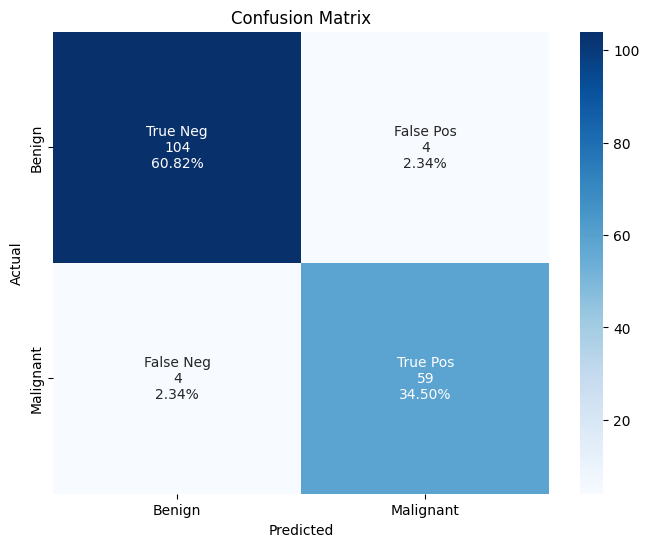

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix : 


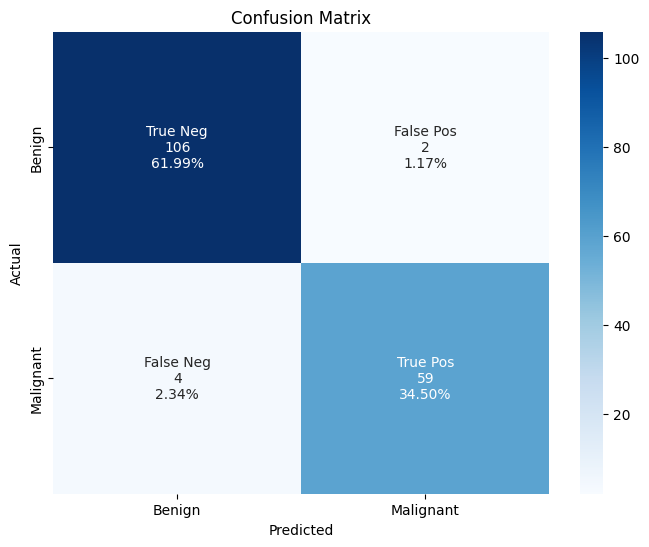

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix : 


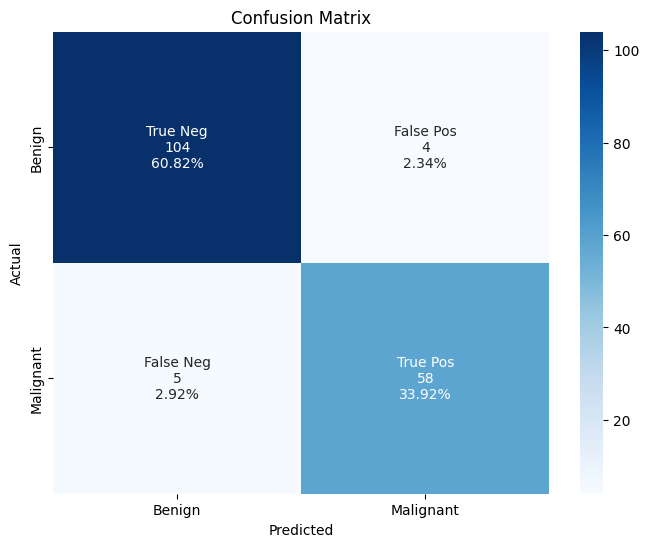

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix : 


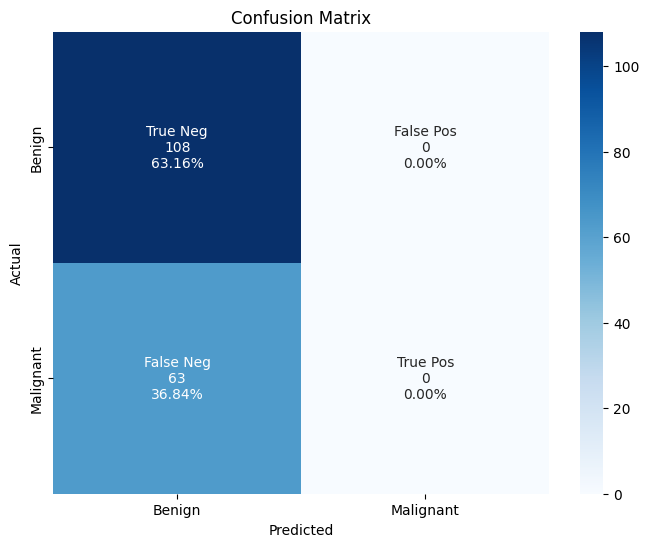

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       108
           1       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



In [58]:
#Train - Test split 70-30
SVMClassifier(0.3, 'rbf', 3)
SVMClassifier(0.3, 'linear', 3,)
SVMClassifier(0.3, 'poly', 2, )
SVMClassifier(0.3, 'sigmoid', 3, 0.01)

Confusion Matrix : 


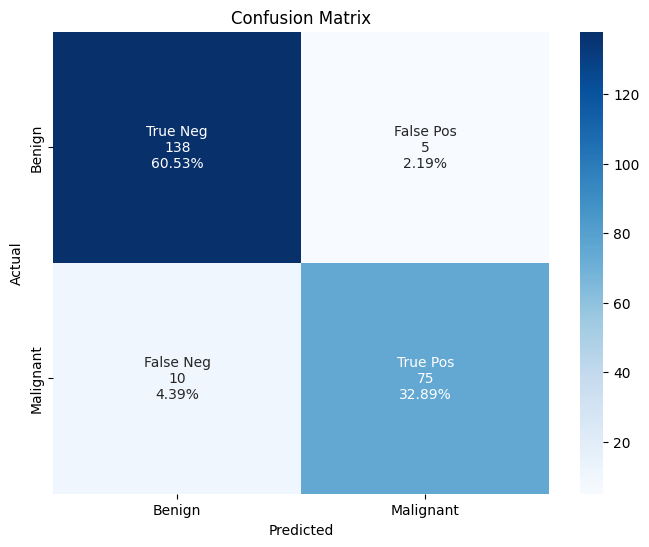

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       143
           1       0.94      0.88      0.91        85

    accuracy                           0.93       228
   macro avg       0.93      0.92      0.93       228
weighted avg       0.93      0.93      0.93       228

Confusion Matrix : 


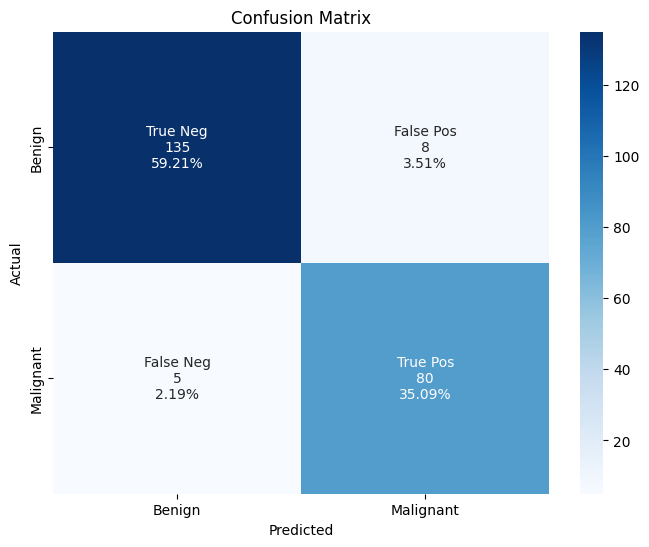

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       143
           1       0.91      0.94      0.92        85

    accuracy                           0.94       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228

Confusion Matrix : 


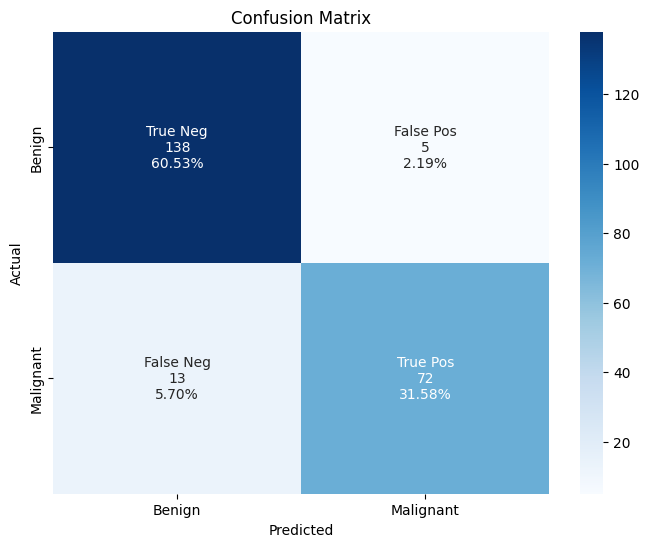

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       143
           1       0.94      0.85      0.89        85

    accuracy                           0.92       228
   macro avg       0.92      0.91      0.91       228
weighted avg       0.92      0.92      0.92       228

Confusion Matrix : 


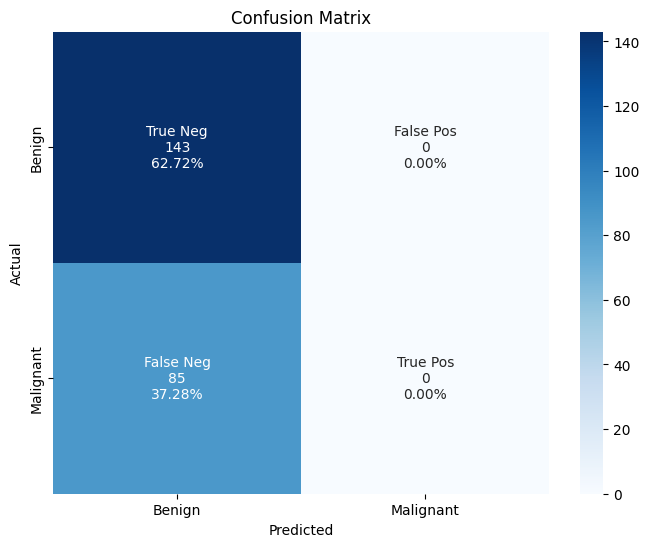

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       143
           1       0.00      0.00      0.00        85

    accuracy                           0.63       228
   macro avg       0.31      0.50      0.39       228
weighted avg       0.39      0.63      0.48       228



In [59]:
#Train - Test split 60-40
SVMClassifier(0.4, 'rbf', 3,)
SVMClassifier(0.4, 'linear', 3,)
SVMClassifier(0.4, 'poly', 5, )
SVMClassifier(0.4, 'sigmoid', 3, 0.1)

Confusion Matrix : 


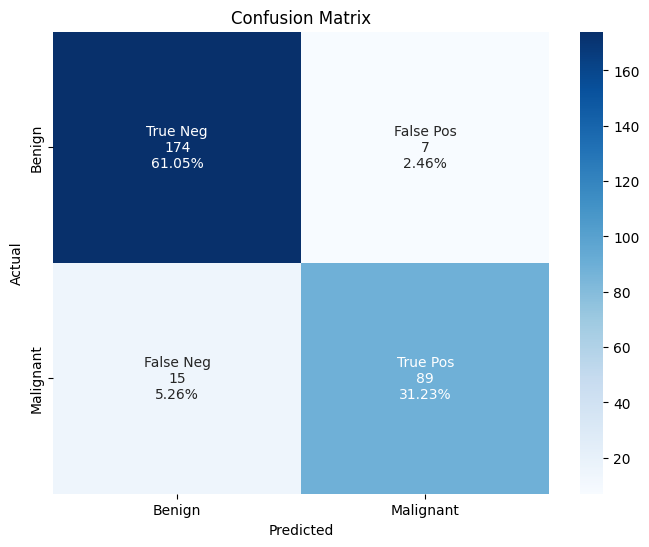

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       181
           1       0.93      0.86      0.89       104

    accuracy                           0.92       285
   macro avg       0.92      0.91      0.92       285
weighted avg       0.92      0.92      0.92       285

Confusion Matrix : 


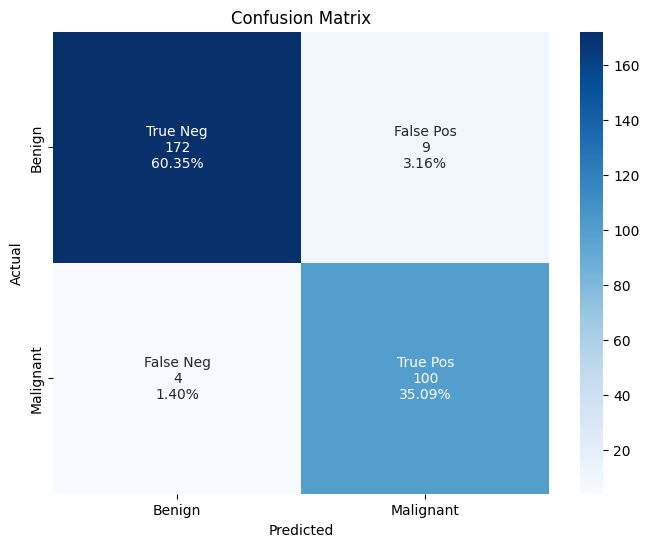

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       181
           1       0.92      0.96      0.94       104

    accuracy                           0.95       285
   macro avg       0.95      0.96      0.95       285
weighted avg       0.96      0.95      0.95       285

Confusion Matrix : 


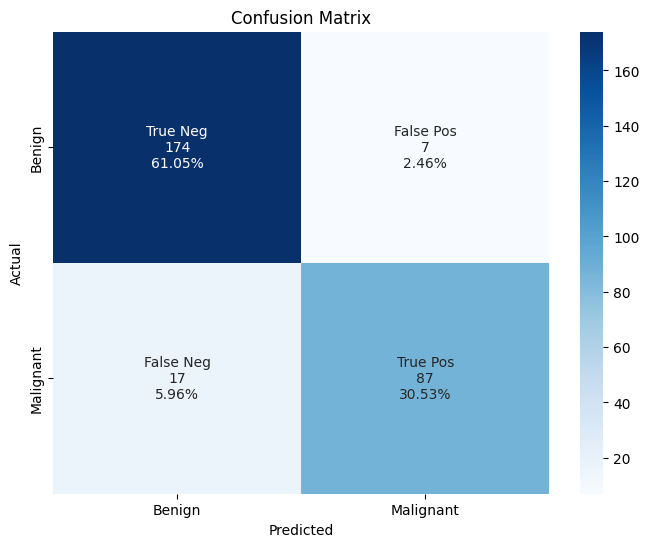

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       181
           1       0.93      0.84      0.88       104

    accuracy                           0.92       285
   macro avg       0.92      0.90      0.91       285
weighted avg       0.92      0.92      0.91       285

Confusion Matrix : 


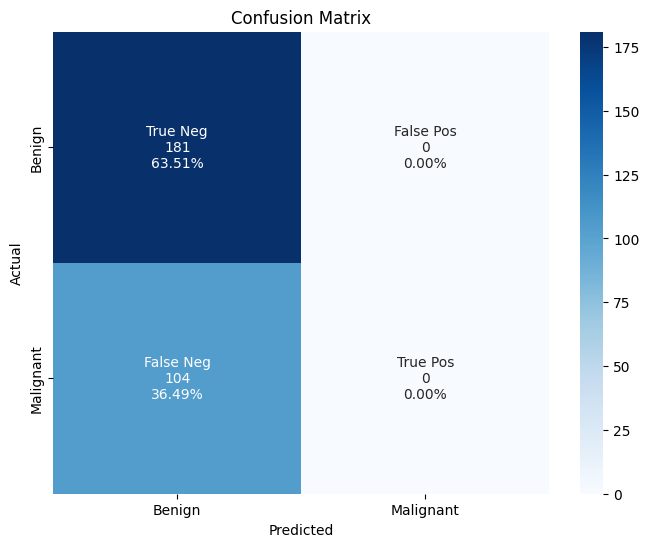

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       181
           1       0.00      0.00      0.00       104

    accuracy                           0.64       285
   macro avg       0.32      0.50      0.39       285
weighted avg       0.40      0.64      0.49       285



In [60]:
#Train - Test split 50-50
SVMClassifier(0.5, 'rbf', 3,)
SVMClassifier(0.5, 'linear', 3, )
SVMClassifier(0.5, 'poly', 4, )
SVMClassifier(0.5, 'sigmoid', 3, 0.3 ) #wrost performance

Confusion Matrix : 


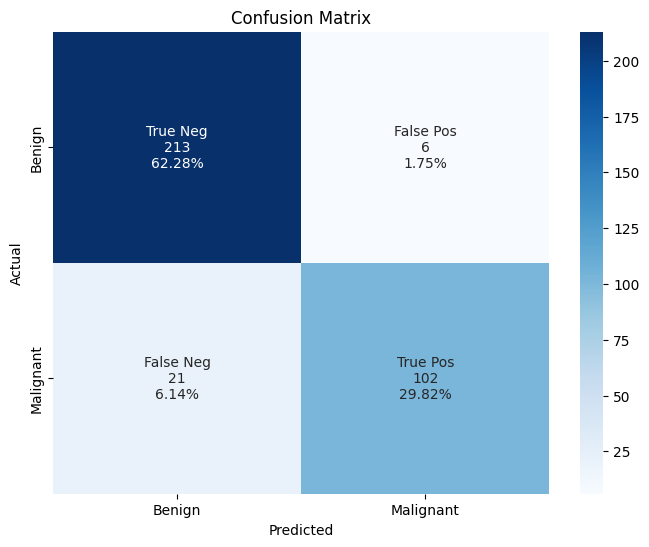

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       219
           1       0.94      0.83      0.88       123

    accuracy                           0.92       342
   macro avg       0.93      0.90      0.91       342
weighted avg       0.92      0.92      0.92       342

Confusion Matrix : 


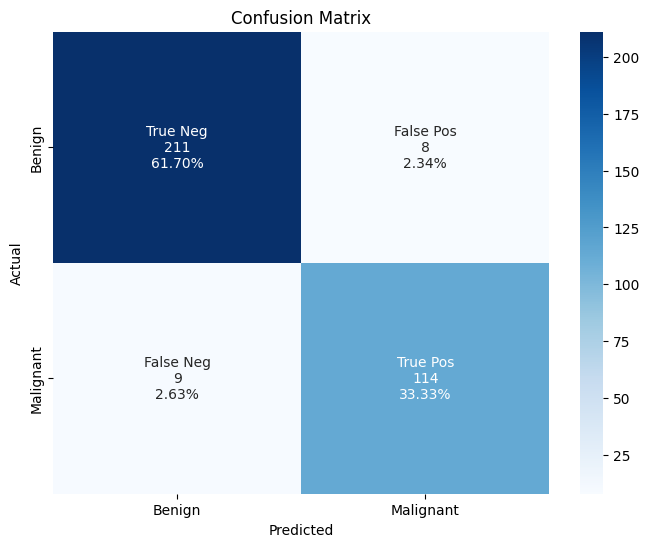

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       219
           1       0.93      0.93      0.93       123

    accuracy                           0.95       342
   macro avg       0.95      0.95      0.95       342
weighted avg       0.95      0.95      0.95       342

Confusion Matrix : 


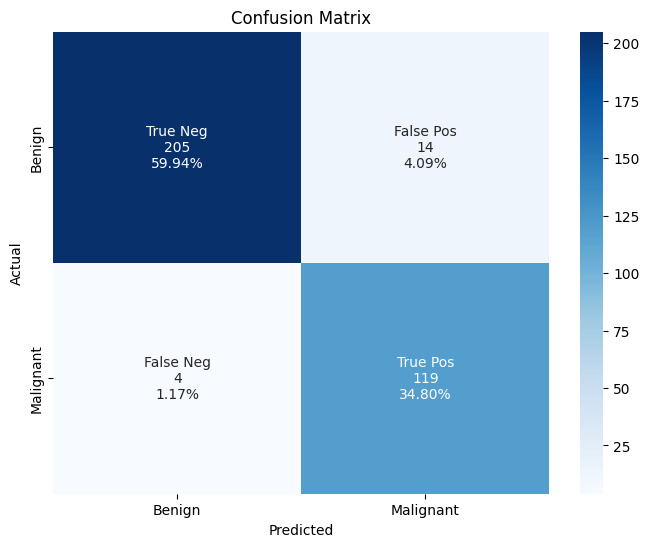

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       219
           1       0.89      0.97      0.93       123

    accuracy                           0.95       342
   macro avg       0.94      0.95      0.94       342
weighted avg       0.95      0.95      0.95       342

Confusion Matrix : 


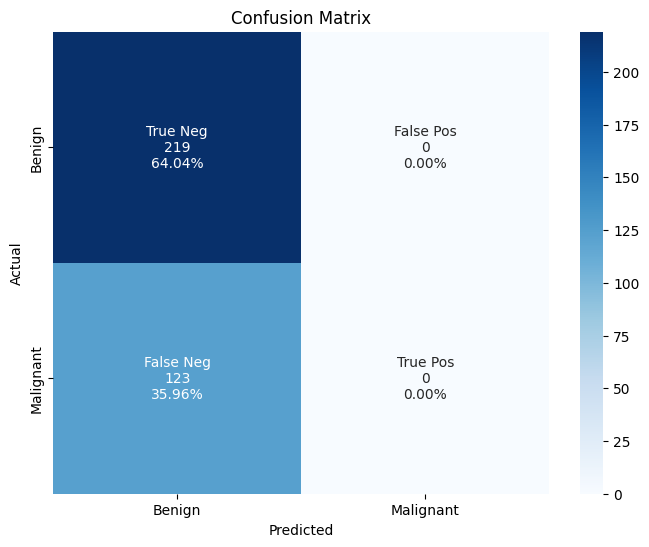

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       219
           1       0.00      0.00      0.00       123

    accuracy                           0.64       342
   macro avg       0.32      0.50      0.39       342
weighted avg       0.41      0.64      0.50       342



In [61]:
#Train - Test split 40-60
SVMClassifier(0.6, 'rbf', 3,)
SVMClassifier(0.6, 'linear', 3, )
SVMClassifier(0.6, 'poly', 2, 0.14)
SVMClassifier(0.6, 'sigmoid', 3, 0.2) #wrost performance

Confusion Matrix : 


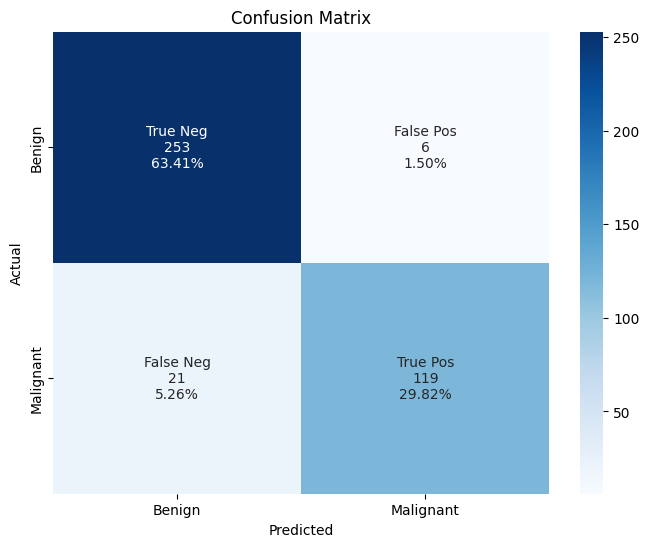

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       259
           1       0.95      0.85      0.90       140

    accuracy                           0.93       399
   macro avg       0.94      0.91      0.92       399
weighted avg       0.93      0.93      0.93       399

Confusion Matrix : 


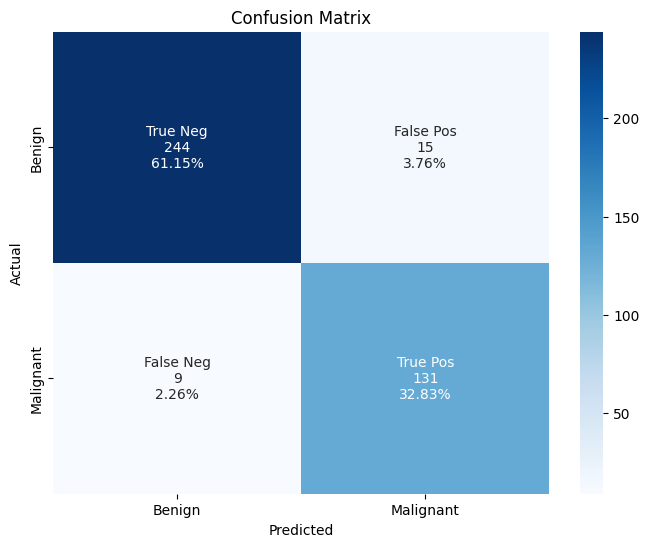

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       259
           1       0.90      0.94      0.92       140

    accuracy                           0.94       399
   macro avg       0.93      0.94      0.93       399
weighted avg       0.94      0.94      0.94       399

Confusion Matrix : 


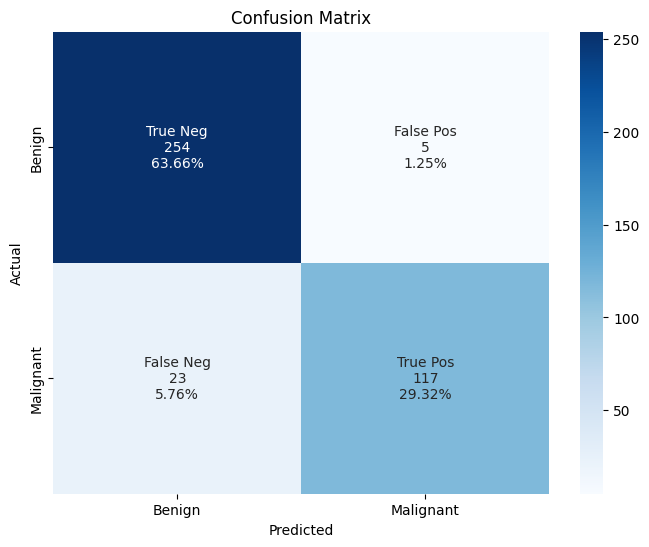

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       259
           1       0.96      0.84      0.89       140

    accuracy                           0.93       399
   macro avg       0.94      0.91      0.92       399
weighted avg       0.93      0.93      0.93       399

Confusion Matrix : 


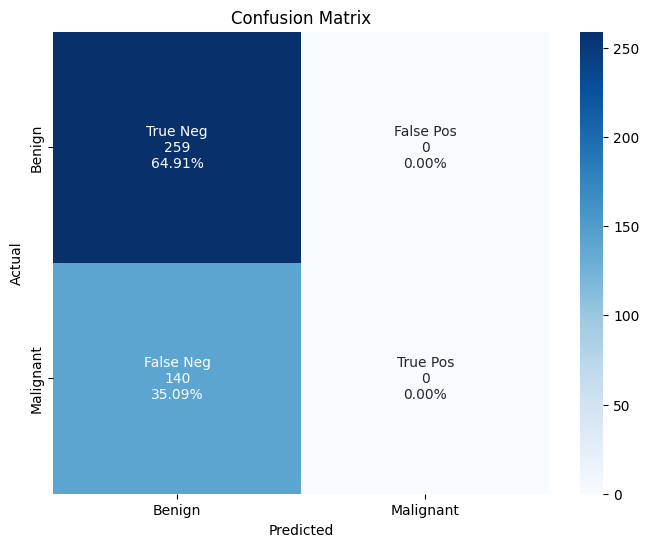

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       259
           1       0.00      0.00      0.00       140

    accuracy                           0.65       399
   macro avg       0.32      0.50      0.39       399
weighted avg       0.42      0.65      0.51       399



In [62]:
#Train - Test split 30-70
SVMClassifier(0.7, 'rbf', 3,)
SVMClassifier(0.7, 'linear')
SVMClassifier(0.7, 'poly', 2,)
SVMClassifier(0.7, 'sigmoid', 3, 0.2 ) #wrost performance

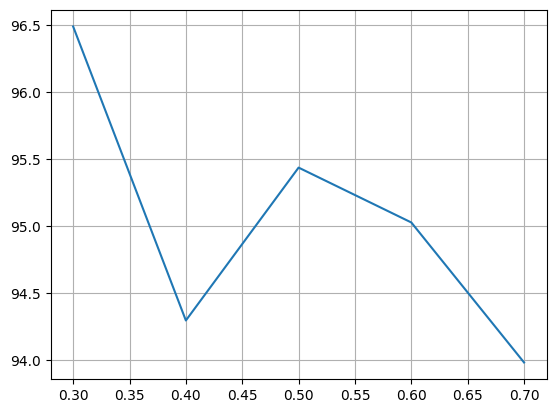

In [63]:
x_points = [float(key) for key in dict_svm]
y_points = [i*100 for i in dict_svm.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **MLP Classifier**

In [64]:
def MLPClassifier(split, hiddenLayerSize = [100, ], activationValue = 'relu', solverValue = 'adam'):
  from sklearn.model_selection import train_test_split
  from sklearn.neural_network import MLPClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  classifier = MLPClassifier(hidden_layer_sizes = hiddenLayerSize, activation = activationValue, solver = solverValue, random_state = 1)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  if(str(split) in dict_mlp):
    dict_mlp[str(split)] = max(accuracy, dict_mlp[str(split)])
  else:
    dict_mlp[str(split)] = accuracy
  print(dict_mlp)
  reports(y_test, y_pred)

{'0.3': 0.9707602339181286}
Confusion Matrix : 


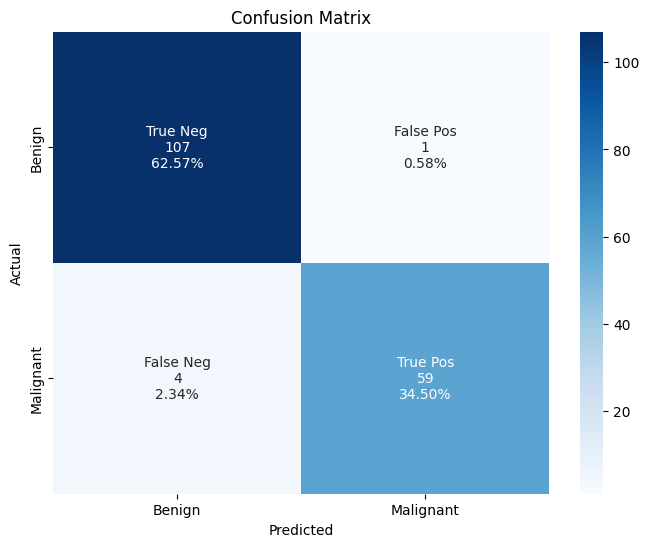

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [65]:
#Train - Test split 70-30
MLPClassifier(0.3, [100, 60,])

{'0.3': 0.9707602339181286, '0.4': 0.956140350877193}
Confusion Matrix : 


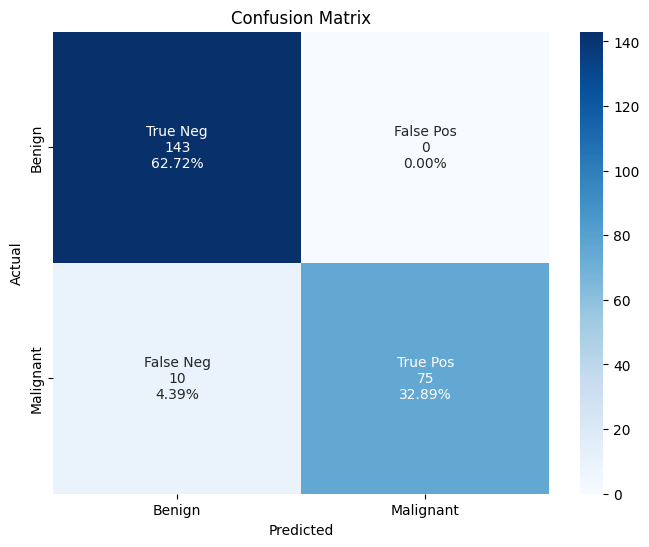

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       143
           1       1.00      0.88      0.94        85

    accuracy                           0.96       228
   macro avg       0.97      0.94      0.95       228
weighted avg       0.96      0.96      0.96       228



In [66]:
#Train - Test split 60-40
MLPClassifier(0.4, [100, 66,])

{'0.3': 0.9707602339181286, '0.4': 0.956140350877193, '0.5': 0.9508771929824561}
Confusion Matrix : 


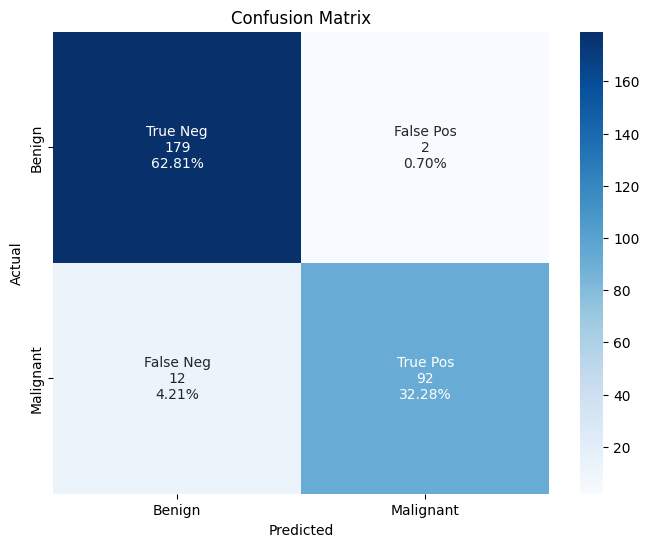

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       181
           1       0.98      0.88      0.93       104

    accuracy                           0.95       285
   macro avg       0.96      0.94      0.95       285
weighted avg       0.95      0.95      0.95       285



In [67]:
#Train - Test split 50-50
MLPClassifier(0.5, [150, 32])

{'0.3': 0.9707602339181286, '0.4': 0.956140350877193, '0.5': 0.9508771929824561, '0.6': 0.9532163742690059}
Confusion Matrix : 


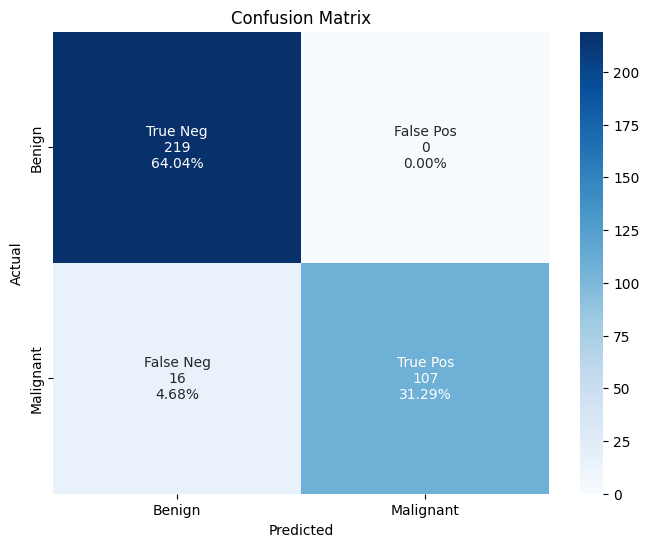

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       219
           1       1.00      0.87      0.93       123

    accuracy                           0.95       342
   macro avg       0.97      0.93      0.95       342
weighted avg       0.96      0.95      0.95       342



In [68]:
#Train - Test split 40-60
MLPClassifier(0.6, [150, 50])

{'0.3': 0.9707602339181286, '0.4': 0.956140350877193, '0.5': 0.9508771929824561, '0.6': 0.9532163742690059, '0.7': 0.9523809523809523}
Confusion Matrix : 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


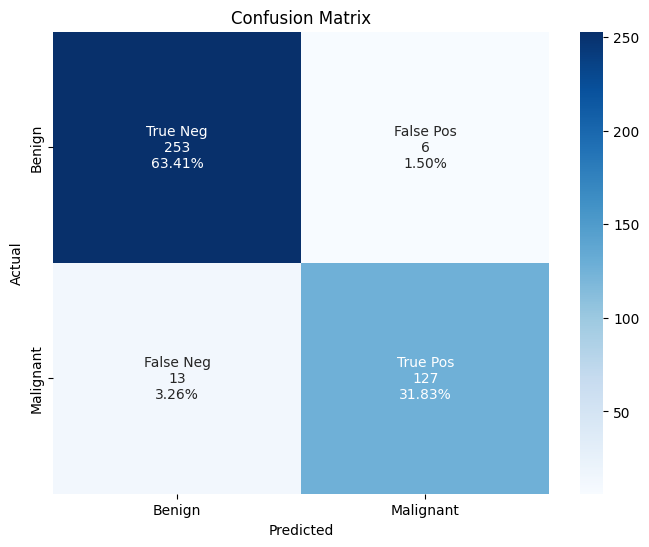

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       259
           1       0.95      0.91      0.93       140

    accuracy                           0.95       399
   macro avg       0.95      0.94      0.95       399
weighted avg       0.95      0.95      0.95       399



In [69]:
#Train - Test split 30-70
MLPClassifier(0.7, [100, 80])

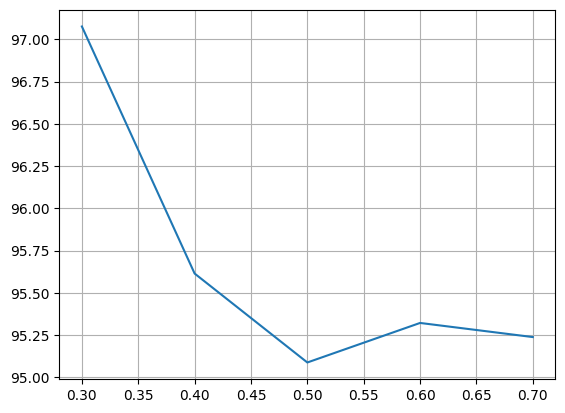

In [70]:
x_points = [float(key) for key in dict_mlp]
y_points = [i*100 for i in dict_mlp.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Random Forest Classifier**

In [71]:
def randomForest(split, estimator = 100, criterionValue = 'gini', ):
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = split, random_state=44)
  classifier = RandomForestClassifier(n_estimators = estimator, criterion = criterionValue)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if(str(split) in dict_rfr):
    dict_rfr[str(split)] = max(accuracy, dict_rfr[str(split)])
  else:
    dict_rfr[str(split)] = accuracy

  reports(y_test, y_pred)


Confusion Matrix : 


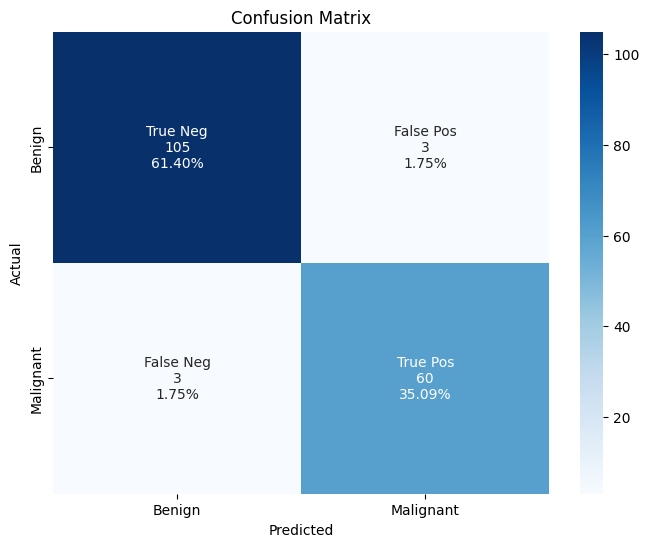

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [72]:
randomForest(0.3)

Confusion Matrix : 


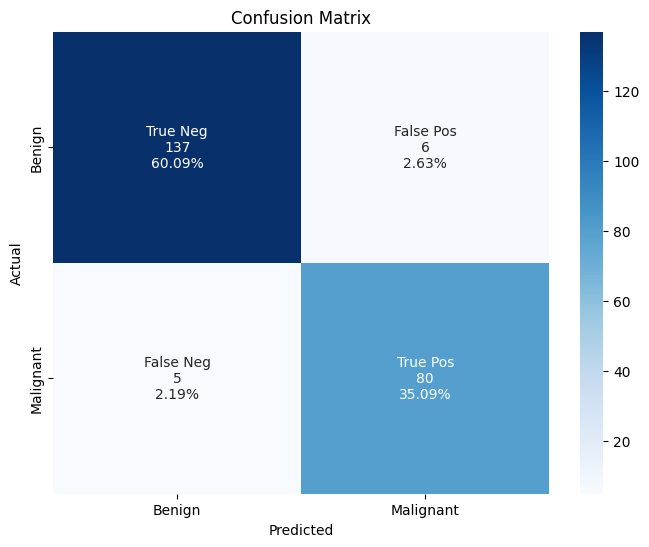

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       143
           1       0.93      0.94      0.94        85

    accuracy                           0.95       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.95      0.95      0.95       228



In [73]:
randomForest(0.4, 100,)

Confusion Matrix : 


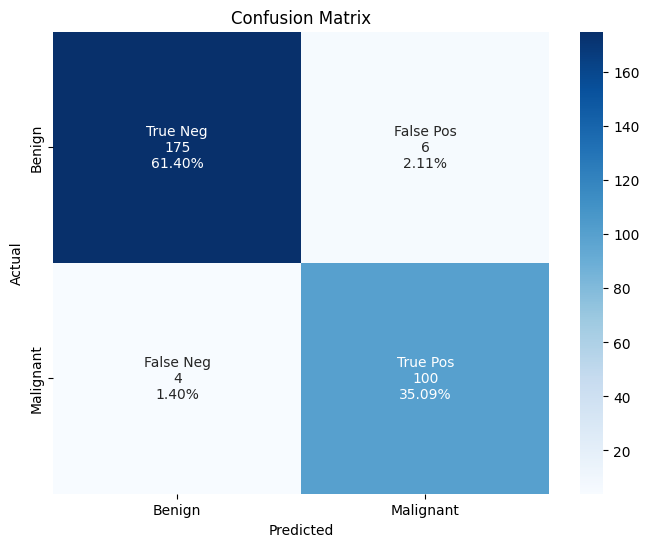

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       181
           1       0.94      0.96      0.95       104

    accuracy                           0.96       285
   macro avg       0.96      0.96      0.96       285
weighted avg       0.97      0.96      0.96       285



In [74]:
randomForest(0.5)

Confusion Matrix : 


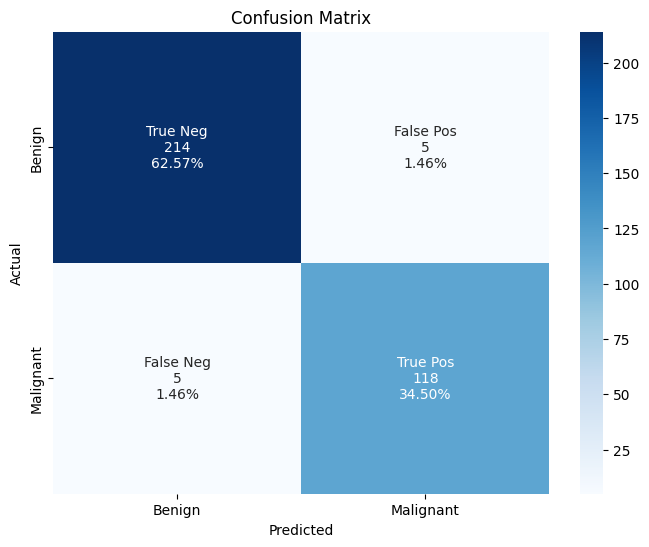

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       219
           1       0.96      0.96      0.96       123

    accuracy                           0.97       342
   macro avg       0.97      0.97      0.97       342
weighted avg       0.97      0.97      0.97       342



In [75]:
randomForest(0.6, 100, 'entropy')

Confusion Matrix : 


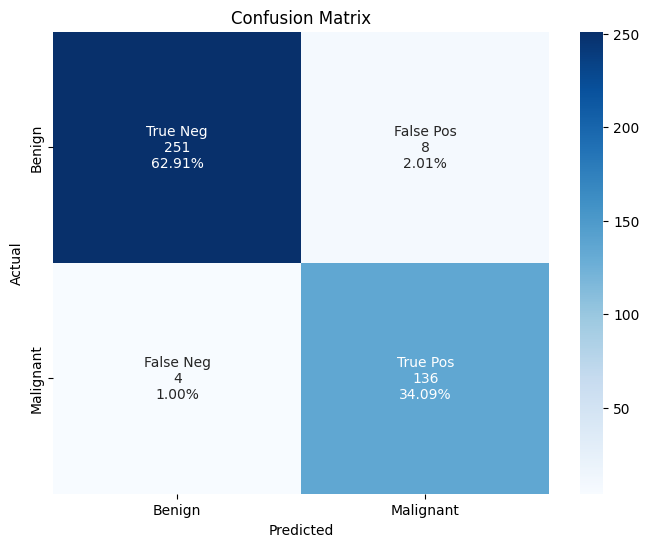

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       259
           1       0.94      0.97      0.96       140

    accuracy                           0.97       399
   macro avg       0.96      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399



In [76]:
randomForest(0.7, 120)

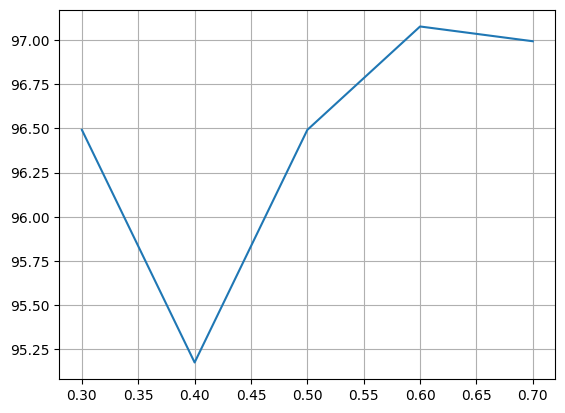

In [77]:
x_points = [float(key) for key in dict_rfr]
y_points = [i*100 for i in dict_rfr.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()